In [146]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-13T03:54:13.886Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9004}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10704, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [147]:
type(data)

dict

In [148]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [149]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19597243.00000,19597243.00000,False,NaN,1,NaN,NaN,None,2024-01-13T03:53:00.000Z,42656.00150,44461347252.08010,0.33490,0.25082,-7.56153,-3.02807,-0.13704,16.95364,58.63035,835940026825.91614,49.98430,895776031523.63000,None,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:19.922478
1,1027,Ethereum,ETH,ethereum,8234,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120181204.34119,120181204.34119,True,NaN,2,NaN,NaN,None,2024-01-13T03:53:00.000Z,2555.59309,24775229094.35725,20.74840,0.17358,-1.70370,13.35056,13.54636,24.25442,64.30546,307134255875.57233,18.36390,307134255875.57001,None,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:19.922478
2,825,Tether USDt,USDT,tether,71246,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95010835101.64194,98602960963.43437,True,NaN,3,NaN,NaN,None,2024-01-13T03:52:00.000Z,0.99973,73375186205.76286,-1.15290,-0.01393,-0.02061,-0.11160,-0.05745,-0.06769,-0.04548,94985188013.19591,5.67960,98576344221.69000,None,2024-01-13T03:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-12 21:54:19.922478
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151689959.19717,151689959.19717,False,NaN,4,NaN,NaN,None,2024-01-13T03:52:00.000Z,295.87317,1171095530.52377,-11.59960,0.02582,-5.30748,-4.00304,18.80176,22.11808,42.71940,44880989537.31310,2.68350,44880989537.31000,None,2024-01-13T03:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:19.922478
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432425571.58659,566889463.27960,True,NaN,5,NaN,NaN,None,2024-01-13T03:53:00.000Z,91.26448,2934980352.61141,-24.28360,0.03552,-7.41476,-7.39788,30.36671,68.40942,315.15486,39465096459.66831,2.35970,51736874089.60000,None,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:19.922478
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,None,2024-01-13T03:53:00.000Z,0.57200,1687710414.18089,-14.01530,0.09083,-4.45511,-0.08851,-8.17734,-13.30877,17.55712,31040531940.82676,1.85590,57199834201.16000,None,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:19.922478
6,3408,USDC,USDC,usd-coin,16166,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25429525767.85607,25429525767.85607,False,NaN,7,NaN,NaN,None,2024-01-13T03:53:00.000Z,1.00011,9381793036.44081,-0.41460,-0.01292,0.00967,0.00791,-0.01343,0.02495,-0.00405,25432331192.23480,1.52060,25432331192.23000,None,2024-01-13T03:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-12 21:54:19.922478
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35386163469.63500,36528237975.52500,False,NaN,8,NaN,NaN,None,2024-01-13T03:52:00.000Z,0.54576,691548193.85773,-32.47460,0.12385,-6.01331,2.00722,-16.70136,51.98170,120.35553,19312336085.09937,1.15480,24559179029.83000,None,2024-01-13T03:52:

In [150]:
def api_runner():   
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    
    if not os.path.isfile(r'/Users/celestandrade/Desktop/cryptocsv/api.csv'):
        df.to_csv(r'/Users/celestandrade/Desktop/cryptocsv/api.csv', header='column_names')
    else:
          df.to_csv(r'/Users/celestandrade/Desktop/cryptocsv/api.csv', mode='a', header=False)  
    

In [151]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()

API runner completed
API runner completed


KeyboardInterrupt: 

In [153]:
df = pd.read_csv(r'/Users/celestandrade/Desktop/cryptocsv/api.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19597243.00000,19597243.00000,False,NaN,1,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,42656.00150,44461347252.08010,0.33490,0.25082,-7.56153,-3.02807,-0.13704,16.95364,58.63035,835940026825.91614,49.98430,895776031523.63000,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
1,1,1027,Ethereum,ETH,ethereum,8234,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120181204.34119,120181204.34119,True,NaN,2,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,2555.59309,24775229094.35725,20.74840,0.17358,-1.70370,13.35056,13.54636,24.25442,64.30546,307134255875.57233,18.36390,307134255875.57001,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
2,2,825,Tether USDt,USDT,tether,71246,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,95010835101.64194,98602960963.43436,True,NaN,3,NaN,NaN,NaN,2024-01-13T03:52:00.000Z,0.99973,73375186205.76286,-1.15290,-0.01393,-0.02061,-0.11160,-0.05745,-0.06769,-0.04548,94985188013.19591,5.67960,98576344221.69000,NaN,2024-01-13T03:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-12 21:54:26.079723
3,3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151689959.19717,151689959.19717,False,NaN,4,NaN,NaN,NaN,2024-01-13T03:52:00.000Z,295.87317,1171095530.52377,-11.59960,0.02582,-5.30748,-4.00304,18.80176,22.11808,42.71940,44880989537.31310,2.68350,44880989537.31000,NaN,2024-01-13T03:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
4,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432425571.58659,566889463.27960,True,NaN,5,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,91.26448,2934980352.61141,-24.28360,0.03552,-7.41476,-7.39788,30.36671,68.40942,315.15486,39465096459.66831,2.35970,51736874089.60000,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
5,5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,0.57200,1687710414.18089,-14.01530,0.09083,-4.45511,-0.08851,-8.17734,-13.30877,17.55712,31040531940.82676,1.85590,57199834201.16000,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
6,6,3408,USDC,USDC,usd-coin,16166,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25429525767.85607,25429525767.85607,False,NaN,7,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,1.00011,9381793036.44082,-0.41460,-0.01292,0.00967,0.00791,-0.01343,0.02495,-0.00405,25432331192.23480,1.52060,25432331192.23000,NaN,2024-01-13T03:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-12 21:54:26.079723
7,7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35386163469.63500,36528237975.52500,False,NaN,8,NaN,NaN,NaN,2024-01-13T03:52:00.000Z,0.54576,691548193.85773,-32.47460,0.12385,-6.01331,2.00722,-16.70136,51.98170,120.35553,19312336085.09937,1.15480,24559179029.83000,NaN,2024-0

In [154]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [155]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19597243.00000,19597243.00000,False,NaN,1,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,42656.00150,44461347252.08010,0.33490,0.25082,-7.56153,-3.02807,-0.13704,16.95364,58.63035,835940026825.91614,49.98430,895776031523.63000,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
1,1,1027,Ethereum,ETH,ethereum,8234,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120181204.34119,120181204.34119,True,NaN,2,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,2555.59309,24775229094.35725,20.74840,0.17358,-1.70370,13.35056,13.54636,24.25442,64.30546,307134255875.57233,18.36390,307134255875.57001,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
2,2,825,Tether USDt,USDT,tether,71246,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,95010835101.64194,98602960963.43436,True,NaN,3,NaN,NaN,NaN,2024-01-13T03:52:00.000Z,0.99973,73375186205.76286,-1.15290,-0.01393,-0.02061,-0.11160,-0.05745,-0.06769,-0.04548,94985188013.19591,5.67960,98576344221.69000,NaN,2024-01-13T03:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-12 21:54:26.079723
3,3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151689959.19717,151689959.19717,False,NaN,4,NaN,NaN,NaN,2024-01-13T03:52:00.000Z,295.87317,1171095530.52377,-11.59960,0.02582,-5.30748,-4.00304,18.80176,22.11808,42.71940,44880989537.31310,2.68350,44880989537.31000,NaN,2024-01-13T03:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
4,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432425571.58659,566889463.27960,True,NaN,5,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,91.26448,2934980352.61141,-24.28360,0.03552,-7.41476,-7.39788,30.36671,68.40942,315.15486,39465096459.66831,2.35970,51736874089.60000,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
5,5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,0.57200,1687710414.18089,-14.01530,0.09083,-4.45511,-0.08851,-8.17734,-13.30877,17.55712,31040531940.82676,1.85590,57199834201.16000,NaN,2024-01-13T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-12 21:54:26.079723
6,6,3408,USDC,USDC,usd-coin,16166,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25429525767.85607,25429525767.85607,False,NaN,7,NaN,NaN,NaN,2024-01-13T03:53:00.000Z,1.00011,9381793036.44082,-0.41460,-0.01292,0.00967,0.00791,-0.01343,0.02495,-0.00405,25432331192.23480,1.52060,25432331192.23000,NaN,2024-01-13T03:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-12 21:54:26.079723
7,7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35386163469.63500,36528237975.52500,False,NaN,8,NaN,NaN,NaN,2024-01-13T03:52:00.000Z,0.54576,691548193.85773,-32.47460,0.12385,-6.01331,2.00722,-16.70136,51.98170,120.35553,19312336085.09937,1.15480,24559179029.83000,NaN,2024-0

In [156]:
df = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23489,-7.55502,-3.03314,-0.13855,16.95361,58.63192
Ethereum,0.16057,-1.72698,13.31356,13.51676,24.22305,64.26986
Tether USDt,-0.01548,-0.02001,-0.10733,-0.05767,-0.05330,-0.04025
BNB,0.05110,-5.29823,-3.97705,18.79825,22.13066,42.75914
Solana,0.02985,-7.39486,-7.39865,30.34730,68.40425,315.17659
XRP,0.08402,-4.47424,-0.09200,-8.18454,-13.31313,17.55306
USDC,-0.00932,0.02259,0.01785,0.00051,0.02550,-0.00183
Cardano,0.13831,-6.01028,2.01716,-16.70714,51.99146,120.40471
Avalanche,0.18029,-8.97775,-0.05779,-8.42718,112.41362,285.64665


In [157]:
df = df.stack()
df

name                                           
Bitcoin            quote.USD.percent_change_1h      0.23489
                   quote.USD.percent_change_24h    -7.55502
                   quote.USD.percent_change_7d     -3.03314
                   quote.USD.percent_change_30d    -0.13855
                   quote.USD.percent_change_60d    16.95361
                   quote.USD.percent_change_90d    58.63192
Ethereum           quote.USD.percent_change_1h      0.16057
                   quote.USD.percent_change_24h    -1.72698
                   quote.USD.percent_change_7d     13.31356
                   quote.USD.percent_change_30d    13.51676
                   quote.USD.percent_change_60d    24.22305
                   quote.USD.percent_change_90d    64.26986
Tether USDt        quote.USD.percent_change_1h     -0.01548
                   quote.USD.percent_change_24h    -0.02001
                   quote.USD.percent_change_7d     -0.10733
                   quote.USD.percent_change_30d    -

In [160]:
type(df)

pandas.core.frame.DataFrame

In [159]:
df = df.to_frame(name='values')
df

values
name                                                    
Bitcoin           quote.USD.percent_change_1h    0.23489
                  quote.USD.percent_change_24h  -7.55502
                  quote.USD.percent_change_7d   -3.03314
                  quote.USD.percent_change_30d  -0.13855
                  quote.USD.percent_change_60d  16.95361
                  quote.USD.percent_change_90d  58.63192
Ethereum          quote.USD.percent_change_1h    0.16057
                  quote.USD.percent_change_24h  -1.72698
                  quote.USD.percent_change_7d   13.31356
                  quote.USD.percent_change_30d  13.51676
                  quote.USD.percent_change_60d  24.22305
                  quote.USD.percent_change_90d  64.26986
Tether USDt       quote.USD.percent_change_1h   -0.01548
                  quote.USD.percent_change_24h  -0.02001
                  quote.USD.percent_change_7d   -0.10733
                  quote.USD.percent_change_30d  -0.05767
                  quote.USD.percent_change_60d  -0.05330
                  quote.USD.percent_change_90d  -0.04025
BNB               quote.USD.percent_change_1h    0.05110
                  quote.USD.percent_change_24h  -5.29823
                  quote.USD.percent_change_7d   -3.97705
                  quote.USD.percent_change_30d  18.79825
                  quote.USD.percent_change_60d  22.13066
                  quote.USD.percent_change_90d  42.75914
Solana            quote.USD.percent_change_1h    0.02985
                  quote.USD.percent_change_24h  -7.39486
                  quote.USD.percent_change_7d   -7.39865
                  quote.USD.percent_change_30d  30.34730
                  quote.USD.percent_change_60d  68.40425
                  quote.USD.percent_change_90d 315.17659
XRP               quote.USD.percent_change_1h    0.08402
                  quote.USD.percent_change_24h  -4.47424
                  quote.USD.percent_change_7d   -0.09200
                  quote.USD.percent_change_30d  -8.18454
                  quote.USD.percent_change_60d -13.31313
                  quote.USD.percent_change_90d  17.55306
USDC              quote.USD.percent_change_1h   -0.00932
                  quote.USD.percent_change_24h   0.02259
                  quote.USD.percent_change_7d    0.01785
                  quote.USD.percent_change_30d   0.00051
                  quote.USD.percent_change_60d   0.02550
                  quote.USD.percent_change_90d  -0.00183
Cardano           quote.USD.percent_change_1h    0.13831
                  quote.USD.percent_change_24h  -6.01028
                  quote.USD.percent_change_7d    2.01716
                  quote.USD.percent_change_30d -16.70714
                  quote.USD.percent_change_60d  51.99146
                  quote.USD.percent_change_90d 120.40471
Avalanche         quote.USD.percent_change_1h    0.18029
                  quote.USD.percent_change_24h  -8.97775
                  quote.USD.percent_change_7d   -0.05779
                  quote.USD.percent_change_30d  -8.42718
                  quote.USD.percent_change_60d 112.41362
                  quote.USD.percent_change_90d 285.64665
Dogecoin          quote.USD.percent_change_1h    0.06467
                  quote.USD.percent_change_24h  -4.44594
                  quote.USD.percent_change_7d   -2.49199
                  quote.USD.percent_change_30d -16.07262
                  quote.USD.percent_change_60d   7.10660
                  quote.USD.percent_change_90d  34.65170
Polkadot          quote.USD.percent_change_1h   -0.12071
                  quote.USD.percent_change_24h  -6.25512
                  quote.USD.percent_change_7d    4.04691
                  quote.USD.percent_change_30d   2.44909
                  quote.USD.percent_change_60d  41.77258
                  quote.USD.percent_change_90d 103.54739
TRON              quote.USD.percent_change_1h    0.17580
                  quote.USD.percent_change_24h  -0.00089
                  quote.USD.percent_change_7d    2.76965
   

In [163]:
df.count()

values    120
dtype: int64

In [164]:
df = df.reset_index()
df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23489
1,Bitcoin,quote.USD.percent_change_24h,-7.55502
2,Bitcoin,quote.USD.percent_change_7d,-3.03314
3,Bitcoin,quote.USD.percent_change_30d,-0.13855
4,Bitcoin,quote.USD.percent_change_60d,16.95361
5,Bitcoin,quote.USD.percent_change_90d,58.63192
6,Ethereum,quote.USD.percent_change_1h,0.16057
7,Ethereum,quote.USD.percent_change_24h,-1.72698
8,Ethereum,quote.USD.percent_change_7d,13.31356
9,Ethereum,quote.USD.percent_change_30d,13.51676


In [171]:
df = df.rename(columns={'level_1': 'percent_change'})
df

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23489
1,Bitcoin,quote.USD.percent_change_24h,-7.55502
2,Bitcoin,quote.USD.percent_change_7d,-3.03314
3,Bitcoin,quote.USD.percent_change_30d,-0.13855
4,Bitcoin,quote.USD.percent_change_60d,16.95361
5,Bitcoin,quote.USD.percent_change_90d,58.63192
6,Ethereum,quote.USD.percent_change_1h,0.16057
7,Ethereum,quote.USD.percent_change_24h,-1.72698
8,Ethereum,quote.USD.percent_change_7d,13.31356
9,Ethereum,quote.USD.percent_change_30d,13.51676


In [174]:
df['percent_change'] = df['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df

ValueError: Replacement lists must match in length. Expecting 6 got 5 

In [176]:
df['percent_change'] = df['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df

,name,percent_change,values
0,Bitcoin,1h,0.23489
1,Bitcoin,24h,-7.55502
2,Bitcoin,7d,-3.03314
3,Bitcoin,30d,-0.13855
4,Bitcoin,60d,16.95361
5,Bitcoin,90d,58.63192
6,Ethereum,1h,0.16057
7,Ethereum,24h,-1.72698
8,Ethereum,7d,13.31356
9,Ethereum,30d,13.51676


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

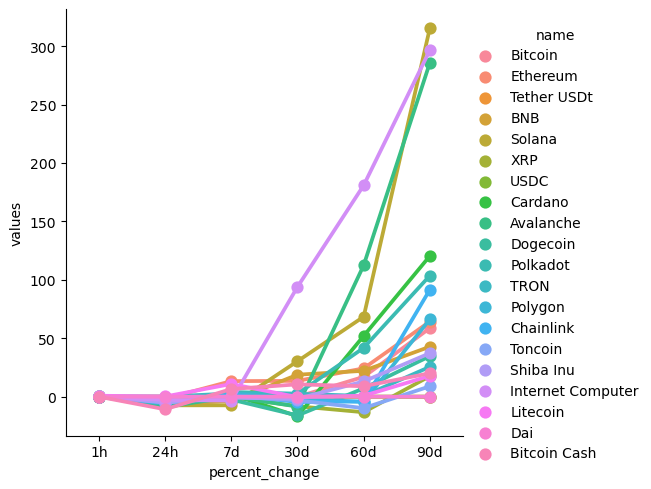

In [177]:
sns.catplot(x='percent_change', y='values', hue='name', data=df, kind='point')